In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib as mpl
import warnings

mpl.rc("font", family='AppleGothic')

In [4]:
chair = pd.read_excel('./오늘의집_의자_20250501-2302.xlsx')
chair

,링크,브랜드명,제품명,할인율,가격,별점,리뷰 갯수
0,https://ohou.se/productions/444838/selling?aff...,다니카,뮤즈 편한 팔걸이 컴퓨터 메쉬 사무용 책상 의자,45.0,47900,4.7,10692
1,https://ohou.se/productions/444869/selling?aff...,다니카,뮤즈 편한 팔걸이 헤드형 컴퓨터 메쉬 책상 의자,49.0,54900,4.7,4919
2,https://ohou.se/productions/1787558/selling?af...,네오체어,[무료배송]버디시리즈(CPS/CPSH) 아마존 최다판매 학생용사무용 메쉬의자,40.0,46900,4.7,1720
3,https://ohou.se/productions/120974/selling?aff...,일루일루,미니 타이탄 기본형 게이밍 학생 컴퓨터 사무용 발받침 의자 3color,35.0,64900,4.6,4171
4,https://ohou.se/productions/2397506/selling?af...,린백토리,포커스 LTY100S 학생 바퀴없는 허리 편한 공부 책상 사무실 회의실의자,36.0,49900,4.7,950
...,...,...,...,...,...,...,...
5688,https://ohou.se/productions/323587/selling?aff...,더젠,코린 게이밍 의자,NaN,122000,NaN,0
5689,https://ohou.se/productions/323558/selling?aff...,더젠,아멜101 의자,NaN,93000,NaN,0
5690,https://ohou.se/productions/318551/selling?aff...,사사가구,로웰 컴퓨터 학생 사무용 의자,58.0,159000,NaN,0
5691,https://ohou.se/productions/318547/selling?aff...,사사가구,로웬 컴퓨터 학생 사무용 의자,58.0,168000,NaN,0


In [5]:
chair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   링크      5693 non-null   object 
 1   브랜드명    5693 non-null   object 
 2   제품명     5693 non-null   object 
 3   할인율     5210 non-null   float64
 4   가격      5693 non-null   int64  
 5   별점      1294 non-null   float64
 6   리뷰 갯수   5693 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 311.5+ KB


In [6]:
chair.isnull().sum()

링크          0
브랜드명        0
제품명         0
할인율       483
가격          0
별점       4399
리뷰 갯수       0
dtype: int64

In [32]:
# 브랜드 갯수
chair.브랜드명.nunique()

337

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '체어포커스'),
  Text(1, 0, '이지아트'),
  Text(2, 0, '듀오백'),
  Text(3, 0, '히트가구'),
  Text(4, 0, '서광퍼니처'),
  Text(5, 0, '우아미가구'),
  Text(6, 0, '르봉상점'),
  Text(7, 0, '로쏘'),
  Text(8, 0, '바이안'),
  Text(9, 0, '이케아')])

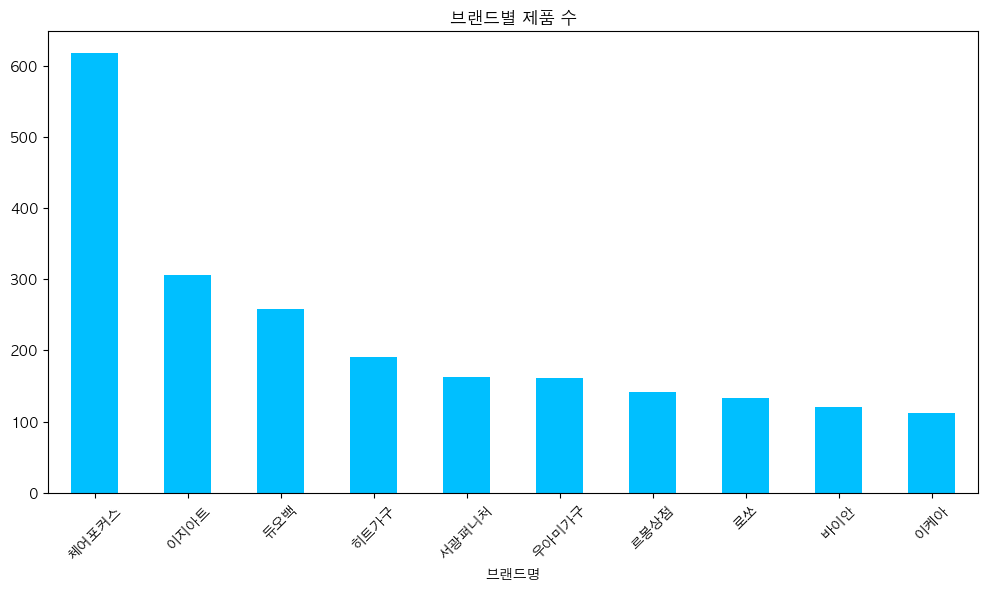

In [109]:
# 브랜드별 제품 수
plt.figure(figsize=(12, 6))
brand_counts = chair['브랜드명'].value_counts()
# sns.barplot(x=brand_counts.index[:10], y=brand_counts.values[:10], color='deepskyblue')
chair['브랜드명'].value_counts()[:10].plot.bar(color='deepskyblue')
plt.title('브랜드별 제품 수')
plt.xticks(rotation=45)

In [74]:
chair.groupby(['브랜드명']).size().sort_values(ascending=False)[chair.groupby(['브랜드명']).size().sort_values(ascending=False) < 30]

브랜드명
시디즈       28
에보니아      28
메리페어      27
보네드       27
삼익가구      27
          ..
르라온        1
정리하는주부     1
리빙에코       1
리빙올        1
락키홈즈       1
Length: 299, dtype: int64

In [31]:
chair['브랜드명'].value_counts()

브랜드명
체어포커스    618
이지아트     306
듀오백      258
히트가구     191
서광퍼니처    163
        ... 
퍼피노        1
라솜퍼니쳐      1
그레떼        1
브라보가구      1
한스마켓       1
Name: count, Length: 337, dtype: int64

In [100]:
chair.groupby(by='브랜드명')['가격'].mean().round(0).sort_values(ascending=False)

브랜드명
카락터      3550000.0
허먼밀러     2972222.0
체어파크     2700000.0
오까무라     2100000.0
하워스      1696667.0
           ...    
베드연구소      22000.0
마켓플랜       21556.0
한스마켓       16900.0
비카         11900.0
디홀릭         8900.0
Name: 가격, Length: 337, dtype: float64

<Axes: xlabel='별점'>

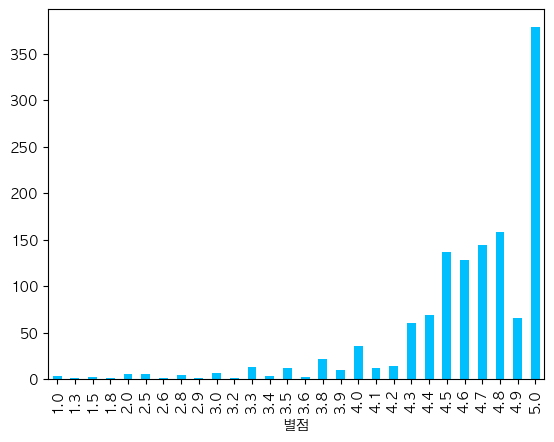

In [102]:
chair.groupby('별점').size().plot.bar(color='deepskyblue')

Text(0.5, 1.0, '브랜드별 리뷰 갯수')

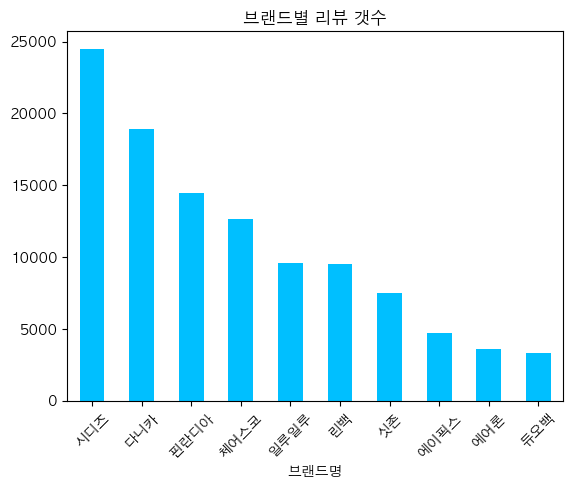

In [105]:
chair.groupby('브랜드명')['리뷰 갯수'].sum().sort_values(ascending=False)[:10].plot.bar(color='deepskyblue')
plt.xticks(rotation=45)
plt.title('브랜드별 리뷰 갯수')

Text(0.5, 1.0, '브랜드별 별점 4.5 이상인 제품 갯수')

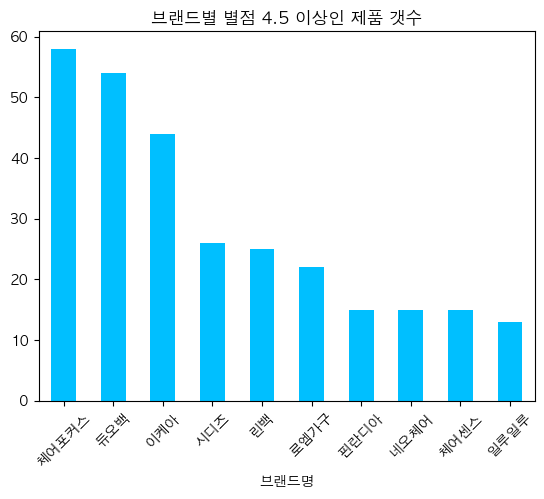

In [110]:
chair[chair['별점']>4.5].groupby('브랜드명').size().sort_values(ascending=False)[:10].plot.bar(color='deepskyblue')
plt.xticks(rotation=45)
plt.title('브랜드별 별점 4.5 이상인 제품 갯수')